### Task-3 Videos:
#### Tasks:
- Load dataset from provided link. Videos are in “.mp4” format.
- Extract frames from video at fps=10 (opencv’s VideoCapture Class)
- Plot 4th frame of 'VID_2.mp4' (matplotlib or Pillow library)
- Print dimensions of any single frame of 'VID_6.mp4'
- Print all pixel values of 10th frame of 'VID_14.mp4'
- Perform sanity check for each video whether all frames have same dimensions or not

In [2]:
import cv2 # For handling videos
import matplotlib.pyplot as plt # For plotting images, you can use pillow library as well
import numpy as np # For mathematical operations 
import glob

In [3]:
V=cv2.VideoCapture(r'C:\Users\TANVI\Desktop\challenge-week-1-master\challenge-week-1-master\data\videos\VID_2.mp4')
print(V.get(5)) #framerate 
print(V.get(7)) #total no. of frames
print(V.get(7)/V.get(5)) #length of video
print("Dimensions =",(V.get(3),V.get(4)))

29.98102466793169
158.0
5.2700000000000005
Dimensions = (1920.0, 1080.0)


In [5]:
fps1=10
print(int(np.ceil(V.get(5)/fps1))) #frame skipping rate - frames

3


In [6]:
F=[]
while(V.isOpened()):
    fid=V.get(1) #current frame no.
    f1,f2=V.read()
    if(f1!=True):
        break
    if(fid%(np.ceil(V.get(5)/fps1))==0):
        F.append(f2)
V.release()

In [7]:
print(np.array(F).shape)

(53, 1080, 1920, 3)


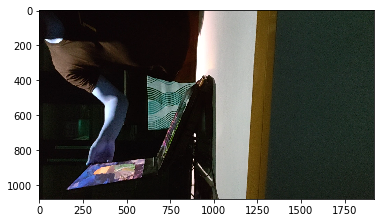

In [8]:
V1=np.array(F)
plt.imshow(V1[3,:,:,:]) #4th Frame of second Video
#plt.imshow(V1[20,:,:,:])
#plt.show()

In [ ]:
VFiles=glob.glob(r'C:\Users\TANVI\Desktop\challenge-week-1-master\challenge-week-1-master\data\videos\*.mp4')
#print(VFiles)
Vid={}
for i in VFiles:
    V=cv2.VideoCapture(i)
    fps=10
    F=[]
    while(V.isOpened()):
        fid=V.get(1)
        f1,f2=V.read()
        if(f1!=True):
            break
        if(fid%(int(np.ceil(V.get(5)/fps)))):
            F.append(f2)
V.release()
Vid[i]=np.array(F)
#len(Vid)

In [33]:
Vid["data/videos/VID_6.mp4"][4,:,:,:].shape

(1080, 1920, 3)

In [36]:
Vid["data/videos/VID_14.mp4"][13,:,:,:]

array([[[19, 11, 15],
        [19, 11, 15],
        [19, 11, 15],
        ...,
        [30, 21, 19],
        [29, 20, 18],
        [28, 19, 17]],

       [[18, 10, 14],
        [18, 10, 14],
        [18, 10, 14],
        ...,
        [28, 19, 17],
        [27, 18, 16],
        [30, 21, 19]],

       [[19, 11, 15],
        [19, 11, 15],
        [19, 11, 15],
        ...,
        [29, 20, 18],
        [29, 20, 18],
        [31, 22, 20]],

       ...,

       [[24, 10, 15],
        [23,  9, 14],
        [23,  9, 14],
        ...,
        [75, 96, 80],
        [75, 96, 80],
        [75, 96, 80]],

       [[25, 11, 16],
        [25, 11, 16],
        [26, 12, 17],
        ...,
        [75, 96, 80],
        [75, 96, 80],
        [74, 95, 79]],

       [[26, 12, 17],
        [27, 13, 18],
        [27, 13, 18],
        ...,
        [75, 96, 80],
        [75, 96, 80],
        [74, 95, 79]]], dtype=uint8)

In [1]:
sanityCheck=True
dset=set()
for i in Vid.values():
    dset.add(Vid[0].shape) # Get dimensions of first frame and add it in set
if len(dset)>1:
    sanityCheck = False
print("Sanity check:", sanityCheck)

Sanity check: True
